In [96]:
import pandas as pd
import numpy as np
import datetime as dt # so that pandas can recognize dates properly
import matplotlib.pyplot as plt # for visualization
from matplotlib import style
import pandas_datareader.data as web # to collect data

In [97]:
style.use('ggplot')
tickers = ['TSLA', 'BAC']
start = dt.datetime(2014, 1, 1)
end = dt.datetime(2020, 11, 20)
returns = pd.DataFrame() # create an empty data frame, returns.
returns

""


# Portfolio Optimization:
Optimal portfolio has the highest sharpe ratio
- [**Data**](#Data): Extract the data online and organize it in the data frame.


## Data

In [98]:
for ticker in tickers:
    data = web.DataReader(ticker, 'yahoo', start, end)
data
# Loop will run for the first time for TSLA, extracts the data from yahoo finance and store it in data 
#frame, data. The loop will then run for BAC, extracts the data from yahoo finance and replace the data
# in data frame, data. This is not the dataframe that we want at the end since it will contain data of
# only BAC, the last ticker in the tickers list.

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-12-31,15.620000,15.510000,15.600000,15.570000,57188900.0,13.512726
2014-01-02,16.160000,15.680000,15.690000,16.100000,148709900.0,13.972696
2014-01-03,16.500000,16.230000,16.270000,16.410000,129921800.0,14.241736
2014-01-06,16.730000,16.559999,16.629999,16.660000,114431300.0,14.458705
2014-01-07,16.790001,16.450001,16.770000,16.500000,110605100.0,14.319844
...,...,...,...,...,...,...
2020-11-16,28.000000,27.180000,27.860001,27.580000,57396700.0,26.760630
2020-11-17,27.600000,27.010000,27.250000,27.549999,46402300.0,26.731522
2020-11-18,27.930000,26.959999,27.629999,26.980000,54416700.0,26.178457


In [100]:
for ticker in tickers:
    data = web.DataReader(ticker, 'yahoo', start, end)
    data[ticker] = data['Adj Close'].pct_change() # add a column to data frame, data, and store returns in it.

# pd.set_option('display.max_rows', None)
data
# still same number of rows as above, so values of one firm (TSLA) replace by another firm (BAC).

,High,Low,Open,Close,Volume,Adj Close,BAC
Date,,,,,,,
2013-12-31,15.620000,15.510000,15.600000,15.570000,57188900.0,13.512727,NaN
2014-01-02,16.160000,15.680000,15.690000,16.100000,148709900.0,13.972696,0.034040
2014-01-03,16.500000,16.230000,16.270000,16.410000,129921800.0,14.241735,0.019255
2014-01-06,16.730000,16.559999,16.629999,16.660000,114431300.0,14.458701,0.015234
2014-01-07,16.790001,16.450001,16.770000,16.500000,110605100.0,14.319846,-0.009604
...,...,...,...,...,...,...,...
2020-11-16,28.000000,27.180000,27.860001,27.580000,57396700.0,26.760630,0.021481
2020-11-17,27.600000,27.010000,27.250000,27.549999,46402300.0,26.731522,-0.001088
2020-11-18,27.930000,26.959999,27.629999,26.980000,54416700.0,26.178453,-0.020690


In [8]:
13.972697 / 13.512726 - 1

# just for confirmation of the return above.

0.034039837705582165

In [9]:
for ticker in tickers:
    data = web.DataReader(ticker, 'yahoo', start, end) 
    data[ticker] = data['Adj Close'].pct_change()
    
    if returns.empty:
        returns = data[[ticker]]
    else:
        returns = returns.join(data[[ticker]], how = 'outer')
data
# loop first running for TSLA, extracting its data from yahoo finance from the start to the end dates 
# and then storing it in a data frame, data. Next, data[ticker] = data[TSLA] column is created which
# contains percentage changes in the Adj Close of TSLA. Next, if-else is evaluated. In the if statement,
# returns.empty outputs True since the data frame, returns, is yet empty, which sets the data frame,
# returns, equal to data[[ticker]] or more precisely to data[[TSLA]]. This finishes the first loop.

# Then the loop runs for BAC, extracting its data from yahoo finance from the start to the end dates
# and then storing it in a data frame, data. Next, data[ticker] = data[BAC] column is created which
# is set equal to percentage changes in the Adj Close of BAC. Next, if-else is evaluated. In the if
# statement,returns.empty turns out to be False this time, therefore, else is executed, where the data 
# frame, returns which already contains the data for TSLA, now takes the data from data[[ticker]] which
# is this time equal to data[[BAC]]. Thus, the data frame, returns, now contains two columns. The first one
# contains percent changes (net returns) of TSLA and the second one contains the percent changes (net returns) of
# BAC.

# The data frame, data, will still contain 1,737 rows since it contains data only for BAC.

# The data frame, returns, will contain 1,737 rows but then two columns, one for TSLA and the other for
# BAC.

,High,Low,Open,Close,Volume,Adj Close,BAC
Date,,,,,,,
2013-12-31,15.620000,15.510000,15.600000,15.570000,57188900.0,13.512727,NaN
2014-01-02,16.160000,15.680000,15.690000,16.100000,148709900.0,13.972695,0.034040
2014-01-03,16.500000,16.230000,16.270000,16.410000,129921800.0,14.241734,0.019255
2014-01-06,16.730000,16.559999,16.629999,16.660000,114431300.0,14.458704,0.015235
2014-01-07,16.790001,16.450001,16.770000,16.500000,110605100.0,14.319844,-0.009604
...,...,...,...,...,...,...,...
2020-11-16,28.000000,27.180000,27.860001,27.580000,57396700.0,26.760630,0.021481
2020-11-17,27.600000,27.010000,27.250000,27.549999,46402300.0,26.731522,-0.001088
2020-11-18,27.930000,26.959999,27.629999,26.980000,54416700.0,26.178453,-0.020690


In [10]:
returns

,TSLA,BAC
Date,,
2013-12-31,NaN,NaN
2014-01-02,-0.002194,0.034040
2014-01-03,-0.003598,0.019255
2014-01-06,-0.017117,0.015235
2014-01-07,0.016054,-0.009604
...,...,...
2020-11-16,-0.001004,0.021481
2020-11-17,0.082139,-0.001088
2020-11-18,0.101968,-0.020690


In [11]:
type(returns)

pandas.core.frame.DataFrame

## Determine the portfolio weights:

In [12]:
number_of_portfolios = 5
for portfolio in range(number_of_portfolios):
    weights = np.random.random_sample(len(tickers))
    print(weights)
    
# Loop will run the first time for 0 and put 0 in portfolio variable. Then, np.random.random_sample(2) will run
# and produce two random numbers and store them in the variable, weights. The loop then runs for 1 in portfolio
# variable, np.random.random_sample(2) generates two random numbers and store them in the variable, weights again.
# The loop runs 5 times in total from 0 to 4. Thus, the variable, weights, contain 5 sets of 2 random numbers and
# each set can be viewed as a seperate portfolio. Hence, the total number of portfolios is equal to 5.

# But now the problem is each portfolio weight is either less than or greater than 1 or 100 percent. We overcome 
# this problem in the following as:

[0.83492799 0.57470449]
[0.75707645 0.96637472]
[0.24678765 0.76615794]
[0.62032753 0.31074027]
[0.13557202 0.11082312]


In [13]:
weights

array([0.13557202, 0.11082312])

In [14]:
weights[0] + weights[1] # these will change every time we run the cells above.

0.24639513760348963

In [15]:
np.sum(weights)

0.24639513760348963

In [16]:
weights / np.sum(weights) # to impose constraint on weights to be equal to 1.

array([0.55022197, 0.44977803])

In [17]:
weights = weights / np.sum(weights)

In [18]:
weights[0] + weights[1] # Now the sum of the weights invested in both the assets is precesiely equal to 1.

1.0

In [19]:
weights = 0 # to start fresh for the following loop.
weights

0

In [20]:
number_of_portfolios = 5
for portfolio in range(number_of_portfolios):
    weights = np.random.random_sample(len(tickers))
    weights = weights / np.sum(weights)
    print(weights)
    
# Now the weights invested in each portfolio is equal to 1.

[0.53563334 0.46436666]
[0.467573 0.532427]
[0.41656101 0.58343899]
[0.01555606 0.98444394]
[0.24805118 0.75194882]


In [21]:
portfolio_return = []
portfolio_risk = []
sharpe_ratio = []
portfolio_weights = []
rf = 0

In [22]:
weights = 0 # to start fresh for the following loop.
weights

0

In [23]:
number_of_portfolios = 5
for portfolio in range(number_of_portfolios):
    # Generate random portfolio weights
    weights = np.random.random_sample(len(tickers))
    weights = np.round((weights / np.sum(weights)), 3) # round-off to 3 decimal points
    portfolio_weights.append(weights)

print(portfolio_weights)

[array([0.138, 0.862]), array([0.028, 0.972]), array([0.616, 0.384]), array([0.398, 0.602]), array([0.264, 0.736])]


## Compute Annualized Portfolio Returns:

In [24]:
returns # the data frame, returns, contains daily returns of the 2 stocks.

,TSLA,BAC
Date,,
2013-12-31,NaN,NaN
2014-01-02,-0.002194,0.034040
2014-01-03,-0.003598,0.019255
2014-01-06,-0.017117,0.015235
2014-01-07,0.016054,-0.009604
...,...,...
2020-11-16,-0.001004,0.021481
2020-11-17,0.082139,-0.001088
2020-11-18,0.101968,-0.020690


In [25]:
returns.mean() 
# generates daily mean return for the two stocks. TSLA on average generates a daily return of $0.0022 per dollar
# investment or $0.22 per 100 dollar investment.

TSLA    0.002186
BAC     0.000582
dtype: float64

In [26]:
weights # the weights of both the assets in a portfolio.

array([0.264, 0.736])

In [27]:
weights[0], weights[1]

(0.264, 0.736)

In [28]:
0.002186 * weights[0] + 0.000582 * weights[1] 
# Portfolio of these weights generate daily expected return of $0.0014 per dollar investment or return of $0.14 
# per 100 dollar investment.

0.001005456

In [29]:
np.sum(returns.mean() * weights) 

# generates the portfolio's daily expected return given the means and weights. We cannot change the mean daily 
# returns but can change the weights, which will change the portfolio's expected return.

# Investing 52.7% of the total available funds in TSLA and 47.3% in BAC has the expected daily portfolio return of
# $0.00143 per dollar of investment or $0.143 per 100 dollars of investment. 

0.0010052493988660666

In [30]:
np.sum(returns.mean() * weights) * 252 
# 252 days since stock markets usally trade for 252 days in a year.
# generates annualized return of the portfolio. So, $1 invested in this portfolio is expected to generate a return
# of almost $0.25 in a year or $100 invested in this portfolio is expected to generate a return of almost $25 in a
# year.

0.2533228485142488

In [31]:
portfolio_return, portfolio_risk, sharpe_ratio, portfolio_weights, rf, weights

([],
 [],
 [],
 [array([0.138, 0.862]),
  array([0.028, 0.972]),
  array([0.616, 0.384]),
  array([0.398, 0.602]),
  array([0.264, 0.736])],
 0,
 array([0.264, 0.736]))

In [32]:
portfolio_return = []
portfolio_risk = []
sharpe_ratio = []
portfolio_weights = []
rf = 0

# to start fresh for the following loop.

In [33]:
weights = 0

In [34]:
number_of_portfolios = 5
for portfolio in range(number_of_portfolios):
    # Generate random portfolio weights
    weights = np.random.random_sample(len(tickers))
    weights = np.round((weights / np.sum(weights)), 3) # round-off to 3 decimal points
    portfolio_weights.append(weights)
    #Generate annualized portfolio return
    annualized_return = np.sum(returns.mean() * weights) * 252
    annualized_return = np.round((annualized_return), 3)
    portfolio_return.append(annualized_return)

print(portfolio_weights)
print(portfolio_return)

[array([0.745, 0.255]), array([0.958, 0.042]), array([0.248, 0.752]), array([0.134, 0.866]), array([0.422, 0.578])]
[0.448, 0.534, 0.247, 0.201, 0.317]


## Compute Covariance Matrix and Portfolio's Risk:

In [35]:
returns

,TSLA,BAC
Date,,
2013-12-31,NaN,NaN
2014-01-02,-0.002194,0.034040
2014-01-03,-0.003598,0.019255
2014-01-06,-0.017117,0.015235
2014-01-07,0.016054,-0.009604
...,...,...
2020-11-16,-0.001004,0.021481
2020-11-17,0.082139,-0.001088
2020-11-18,0.101968,-0.020690


In [36]:
returns.cov()

,TSLA,BAC
TSLA,0.001160,0.000187
BAC,0.000187,0.000410


In [37]:
returns.cov() * 252

,TSLA,BAC
TSLA,0.292387,0.047138
BAC,0.047138,0.103215


In [38]:
covariance_matrix = returns.cov() * 252
covariance_matrix

,TSLA,BAC
TSLA,0.292387,0.047138
BAC,0.047138,0.103215


In [39]:
weights

array([0.422, 0.578])

In [40]:
weights.T # step A in excel.

array([0.422, 0.578])

In [41]:
np.dot(covariance_matrix, weights) # step B in excel.

array([0.15063286, 0.07955051])

In [42]:
np.dot(weights.T, np.dot(covariance_matrix, weights)) # step C in excel.

0.10954726253226656

In [43]:
portfolio_variance = np.dot(weights.T, np.dot(covariance_matrix, weights))
portfolio_variance

0.10954726253226656

In [44]:
standard_deviation = np.sqrt(portfolio_variance)
standard_deviation

0.33097924788763805

In [45]:
portfolio_return, portfolio_risk, sharpe_ratio, portfolio_weights, weights, annualized_return, rf

([0.448, 0.534, 0.247, 0.201, 0.317],
 [],
 [],
 [array([0.745, 0.255]),
  array([0.958, 0.042]),
  array([0.248, 0.752]),
  array([0.134, 0.866]),
  array([0.422, 0.578])],
 array([0.422, 0.578]),
 0.317,
 0)

In [46]:
portfolio_return = []
portfolio_risk = []
sharpe_ratio = []
portfolio_weights = []
rf = 0

# to start fresh for the following loop.

In [47]:
weights = 0
annualized_return = 0

In [48]:
number_of_portfolios = 5
for portfolio in range(number_of_portfolios):
    # Generate random portfolio weights
    weights = np.random.random_sample(len(tickers))
    weights = np.round((weights / np.sum(weights)), 3) # round-off to 3 decimal points
    portfolio_weights.append(weights)
    #Generate annualized portfolio return
    annualized_return = np.sum(returns.mean() * weights) * 252
    portfolio_return.append(annualized_return)
    # Generate Portfolio risk
    covariance_matrix = returns.cov() * 252
    portfolio_variance = np.dot(weights.T, np.dot(covariance_matrix, weights))
    portfolio_standard_deviation = np.sqrt(portfolio_variance)
    portfolio_risk.append(portfolio_standard_deviation)

print(portfolio_weights)
print(portfolio_return)
print(portfolio_risk)

[array([0.4, 0.6]), array([0.456, 0.544]), array([0.194, 0.806]), array([0.951, 0.049]), array([0.605, 0.395])]
[0.3082962548702496, 0.3309323633697794, 0.22502771288983658, 0.5310193938566942, 0.39116058062745673]
[0.3264436880463228, 0.3387169839748285, 0.30462742726175923, 0.5187252466749268, 0.38164711721534866]


## Compute Sharpe Ratio

In [49]:
annualized_return # the portfolio's expected annual return.

0.39116058062745673

In [50]:
rf

0

In [51]:
annualized_return - rf

0.39116058062745673

In [52]:
portfolio_standard_deviation

0.38164711721534866

In [53]:
shrp_ratio = (annualized_return - rf) / portfolio_standard_deviation

In [54]:
shrp_ratio
# risk premium per unit of risk. The higher the shrp ratio is, the better it is.

1.0249273818220406

In [55]:
portfolio_return, portfolio_risk, sharpe_ratio, portfolio_weights, weights, annualized_return, rf

([0.3082962548702496,
  0.3309323633697794,
  0.22502771288983658,
  0.5310193938566942,
  0.39116058062745673],
 [0.3264436880463228,
  0.3387169839748285,
  0.30462742726175923,
  0.5187252466749268,
  0.38164711721534866],
 [],
 [array([0.4, 0.6]),
  array([0.456, 0.544]),
  array([0.194, 0.806]),
  array([0.951, 0.049]),
  array([0.605, 0.395])],
 array([0.605, 0.395]),
 0.39116058062745673,
 0)

In [56]:
portfolio_return = []
portfolio_risk = []
sharpe_ratio = []
portfolio_weights = []
rf = 0

In [57]:
weights = 0
annualized_return = 0

In [58]:
number_of_portfolios = 5
for portfolio in range(number_of_portfolios):
    # Generate random portfolio weights
    weights = np.random.random_sample(len(tickers))
    weights = np.round((weights / np.sum(weights)), 3) # round-off to 3 decimal points
    portfolio_weights.append(weights)
    #Generate annualized portfolio return
    annualized_return = np.sum(returns.mean() * weights) * 252
    portfolio_return.append(annualized_return)
    # Generate Portfolio risk
    covariance_matrix = returns.cov() * 252
    portfolio_variance = np.dot(weights.T, np.dot(covariance_matrix, weights))
    portfolio_standard_deviation = np.sqrt(portfolio_variance)
    portfolio_risk.append(portfolio_standard_deviation)
    #Generate Sharpe Ratio
    shrp_ratio = (annualized_return - rf) / portfolio_standard_deviation
    sharpe_ratio.append(shrp_ratio)

print(portfolio_weights)
print(portfolio_return)
print(portfolio_risk)
print(sharpe_ratio)

[array([0.384, 0.616]), array([0.301, 0.699]), array([0.776, 0.224]), array([0.751, 0.249]), array([0.527, 0.473])]
[0.30182879529895534, 0.2682788487728667, 0.4602815547956637, 0.4501761492155165, 0.35963171521739745]
[0.32338849687303517, 0.3110579631476379, 0.4445611194840773, 0.43466690967041827, 0.3574866134805325]
[0.9333318847684792, 0.8624722095461452, 1.035361696339595, 1.0356807458770165, 1.0060005092665707]


In [59]:
# Based on the Sharpe Ratio, the portfolio 5 is the best among all the five portfolios since it has the highest Sharpe 
# Ratio, thus, the highest risk premium it offers per unit of risk.

In [60]:
type(portfolio_weights), type(portfolio_return), type(portfolio_risk), type(sharpe_ratio)

(list, list, list, list)

In [61]:
portfolio_weights = np.array(portfolio_weights)
portfolio_return = np.array(portfolio_return)
portfolio_risk = np.array(portfolio_risk)
sharpe_ratio = np.array(sharpe_ratio)
# change the lists to numpy arrays for better data manipulations.

In [62]:
print(portfolio_weights)
print(portfolio_return)
print(portfolio_risk)
print(sharpe_ratio)

# list items are seperated by commas, where arrays elements are not it appears.

[[0.384 0.616]
 [0.301 0.699]
 [0.776 0.224]
 [0.751 0.249]
 [0.527 0.473]]
[0.3018288  0.26827885 0.46028155 0.45017615 0.35963172]
[0.3233885  0.31105796 0.44456112 0.43466691 0.35748661]
[0.93333188 0.86247221 1.0353617  1.03568075 1.00600051]


In [63]:
type(portfolio_weights), type(portfolio_return), type(portfolio_risk), type(sharpe_ratio)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [64]:
portfolio_metrics = [portfolio_return, portfolio_risk, sharpe_ratio, portfolio_weights]
portfolio_metrics

[array([0.3018288 , 0.26827885, 0.46028155, 0.45017615, 0.35963172]),
 array([0.3233885 , 0.31105796, 0.44456112, 0.43466691, 0.35748661]),
 array([0.93333188, 0.86247221, 1.0353617 , 1.03568075, 1.00600051]),
 array([[0.384, 0.616],
        [0.301, 0.699],
        [0.776, 0.224],
        [0.751, 0.249],
        [0.527, 0.473]])]

In [65]:
portfolio_df = pd.DataFrame(portfolio_metrics)
portfolio_df

# row 0 is portfolio_return, row 1 is portfolio_risk, row 3 is sharpe_ratio, and row 4 is portfolio_weights.

,0,1,2,3,4
0,0.301829,0.268279,0.460282,0.450176,0.359632
1,0.323388,0.311058,0.444561,0.434667,0.357487
2,0.933332,0.862472,1.03536,1.03568,1.006
3,"[0.384, 0.616]","[0.301, 0.699]","[0.776, 0.224]","[0.751, 0.249]","[0.527, 0.473]"


In [66]:
portfolio_df = portfolio_df.T
portfolio_df

# now column 0 is portfolio_return, column 1 is portfolio_risk, column 2 is sharpe_ratio, and column 4 is portfolio
# _weights.

,0,1,2,3
0,0.301829,0.323388,0.933332,"[0.384, 0.616]"
1,0.268279,0.311058,0.862472,"[0.301, 0.699]"
2,0.460282,0.444561,1.03536,"[0.776, 0.224]"
3,0.450176,0.434667,1.03568,"[0.751, 0.249]"
4,0.359632,0.357487,1.006,"[0.527, 0.473]"


In [67]:
portfolio_df.columns = ['Return', 'Risk', 'Sharpe', 'Weights']
portfolio_df

,Return,Risk,Sharpe,Weights
0,0.301829,0.323388,0.933332,"[0.384, 0.616]"
1,0.268279,0.311058,0.862472,"[0.301, 0.699]"
2,0.460282,0.444561,1.03536,"[0.776, 0.224]"
3,0.450176,0.434667,1.03568,"[0.751, 0.249]"
4,0.359632,0.357487,1.006,"[0.527, 0.473]"


## Everything Together:

In [68]:
returns, portfolio_return, portfolio_risk, sharpe_ratio, portfolio_weights, rf, weights, annualized_return
# the data carried forward from previous work. It needs to be deleted to run the following loops.

(                TSLA       BAC
 Date                          
 2013-12-31       NaN       NaN
 2014-01-02 -0.002194  0.034040
 2014-01-03 -0.003598  0.019255
 2014-01-06 -0.017117  0.015235
 2014-01-07  0.016054 -0.009604
 ...              ...       ...
 2020-11-16 -0.001004  0.021481
 2020-11-17  0.082139 -0.001088
 2020-11-18  0.101968 -0.020690
 2020-11-19  0.025953  0.000000
 2020-11-20 -0.019348 -0.006301
 
 [1737 rows x 2 columns],
 array([0.3018288 , 0.26827885, 0.46028155, 0.45017615, 0.35963172]),
 array([0.3233885 , 0.31105796, 0.44456112, 0.43466691, 0.35748661]),
 array([0.93333188, 0.86247221, 1.0353617 , 1.03568075, 1.00600051]),
 array([[0.384, 0.616],
        [0.301, 0.699],
        [0.776, 0.224],
        [0.751, 0.249],
        [0.527, 0.473]]),
 0,
 array([0.527, 0.473]),
 0.35963171521739745)

In [69]:
returns = pd.DataFrame()
portfolio_return = []
portfolio_risk = []
sharpe_ratio = []
portfolio_weights = []
rf = 0
weights = 0
annualized_return = 0

In [70]:
tickers = ['TSLA', 'BAC']
returns = pd.DataFrame()

In [71]:
for ticker in tickers:
    data = web.DataReader(ticker, 'yahoo', start, end) 
    data[ticker] = data['Adj Close'].pct_change()
    
    if returns.empty:
        returns = data[[ticker]]
    else:
        returns = returns.join(data[[ticker]], how = 'outer')
        
returns

,TSLA,BAC
Date,,
2013-12-31,NaN,NaN
2014-01-02,-0.002194,0.034040
2014-01-03,-0.003598,0.019255
2014-01-06,-0.017117,0.015234
2014-01-07,0.016054,-0.009603
...,...,...
2020-11-16,-0.001004,0.021481
2020-11-17,0.082139,-0.001088
2020-11-18,0.101968,-0.020690


In [72]:
number_of_portfolios = 10000
for portfolio in range(number_of_portfolios):
    # Generate random portfolio weights
    weights = np.random.random_sample(len(tickers))
    weights = np.round((weights / np.sum(weights)), 3) # round-off to 3 decimal points
    portfolio_weights.append(weights)
    #Generate annualized portfolio return
    annualized_return = np.sum(returns.mean() * weights) * 252
    portfolio_return.append(annualized_return)
    # Generate Portfolio risk
    covariance_matrix = returns.cov() * 252
    portfolio_variance = np.dot(weights.T, np.dot(covariance_matrix, weights))
    portfolio_standard_deviation = np.sqrt(portfolio_variance)
    portfolio_risk.append(portfolio_standard_deviation)
    #Generate Sharpe Ratio
    shrp_ratio = (annualized_return - rf) / portfolio_standard_deviation
    sharpe_ratio.append(shrp_ratio)

# print(portfolio_weights)
# print(portfolio_return)
# print(portfolio_risk)
# print(sharpe_ratio)

# comment out the print statements since this is too much output.

In [73]:
portfolio_weights = np.array(portfolio_weights)
portfolio_return = np.array(portfolio_return)
portfolio_risk = np.array(portfolio_risk)
sharpe_ratio = np.array(sharpe_ratio)

In [74]:
# print(portfolio_weights)
# print(portfolio_return)
# print(portfolio_risk)
# print(sharpe_ratio)

# comment out these print statement since this will be too much of the output.

In [75]:
portfolio_metrics = [portfolio_return, portfolio_risk, sharpe_ratio, portfolio_weights]
#portfolio_metrics

# comment out printing of the portfolio_metrics due too much output.

In [76]:
portfolio_df = pd.DataFrame(portfolio_metrics)
#portfolio_df

In [77]:
portfolio_df = portfolio_df.T
#portfolio_df

In [78]:
portfolio_df.columns = ['Return', 'Risk', 'Sharpe', 'Weights']
portfolio_df

,Return,Risk,Sharpe,Weights
0,0.396011,0.385652,1.02686,"[0.617, 0.383]"
1,0.320423,0.332722,0.963035,"[0.43, 0.57]"
2,0.220581,0.304601,0.724164,"[0.183, 0.817]"
3,0.39682,0.386326,1.02716,"[0.619, 0.381]"
4,0.168437,0.313109,0.537951,"[0.054, 0.946]"
...,...,...,...,...
9995,0.333358,0.340171,0.979972,"[0.462, 0.538]"
9996,0.332145,0.339441,0.978507,"[0.459, 0.541]"
9997,0.223411,0.304604,0.733447,"[0.19, 0.81]"
9998,0.386714,0.37804,1.02295,"[0.594, 0.406]"


### Identify a minimum risk portfolio:

In [79]:
portfolio_df

,Return,Risk,Sharpe,Weights
0,0.396011,0.385652,1.02686,"[0.617, 0.383]"
1,0.320423,0.332722,0.963035,"[0.43, 0.57]"
2,0.220581,0.304601,0.724164,"[0.183, 0.817]"
3,0.39682,0.386326,1.02716,"[0.619, 0.381]"
4,0.168437,0.313109,0.537951,"[0.054, 0.946]"
...,...,...,...,...
9995,0.333358,0.340171,0.979972,"[0.462, 0.538]"
9996,0.332145,0.339441,0.978507,"[0.459, 0.541]"
9997,0.223411,0.304604,0.733447,"[0.19, 0.81]"
9998,0.386714,0.37804,1.02295,"[0.594, 0.406]"


In [80]:
portfolio_df['Risk'].astype(float).idxmin() # returns the row index of minimum risk, which in this case is 1.

1363

In [81]:
portfolio_df.iloc[portfolio_df['Risk'].astype(float).idxmin()] 
#.iloc gets 1, so portfolio_df.iloc[1] produces the entire row indexed 1.

Return           0.221794
Risk             0.304597
Sharpe           0.728157
Weights    [0.186, 0.814]
Name: 1363, dtype: object

In [82]:
min_risk_portfolio = portfolio_df.iloc[portfolio_df['Risk'].astype(float).idxmin()]
min_risk_portfolio

# among all the known portfolios, this is the one with the minimum risk.

Return           0.221794
Risk             0.304597
Sharpe           0.728157
Weights    [0.186, 0.814]
Name: 1363, dtype: object

In [83]:
max_return_portfolio = portfolio_df.iloc[portfolio_df['Return'].astype(float).idxmax()]
max_return_portfolio

# among all the known portfolios, this is the one with the maximum return.

Return       0.550826
Risk         0.540728
Sharpe        1.01867
Weights    [1.0, 0.0]
Name: 220, dtype: object

In [84]:
max_sharpe_portfolio = portfolio_df.iloc[portfolio_df['Sharpe'].astype(float).idxmax()]
max_sharpe_portfolio

# among all the known portfolios, this is the one with the maximum sharpe ratio.

Return           0.448559
Risk             0.433103
Sharpe            1.03569
Weights    [0.747, 0.253]
Name: 878, dtype: object

In [85]:
print('Minimum Risk Portfolio')
print(min_risk_portfolio)
print(tickers)
print('')

print('Maximum Return Portfolio')
print(max_return_portfolio)
print(tickers)
print('')

print('Maximum Sharpe Ratio Portfolio')
print(max_sharpe_portfolio)
print(tickers)
print('')

Minimum Risk Portfolio
Return           0.221794
Risk             0.304597
Sharpe           0.728157
Weights    [0.186, 0.814]
Name: 1363, dtype: object
['TSLA', 'BAC']

Maximum Return Portfolio
Return       0.550826
Risk         0.540728
Sharpe        1.01867
Weights    [1.0, 0.0]
Name: 220, dtype: object
['TSLA', 'BAC']

Maximum Sharpe Ratio Portfolio
Return           0.448559
Risk             0.433103
Sharpe            1.03569
Weights    [0.747, 0.253]
Name: 878, dtype: object
['TSLA', 'BAC']



### Visualization:

In [86]:
# portfolio_risk # will be shown along x-axis. Commented out due too much output.

In [87]:
# portfolio_return # will be shown along y-axis. Commented out due too much output.

In [88]:
# portfolio_return / portfolio_risk # commented out due to too much output.

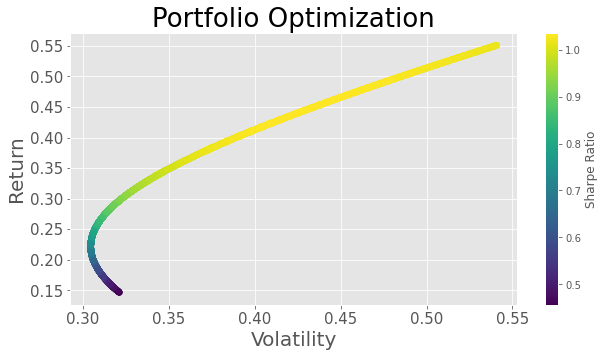

In [89]:
plt.figure(figsize = (10, 5))
plt.scatter(portfolio_risk, portfolio_return, c = portfolio_return / portfolio_risk) # c for colorbar based on sharpe.

plt.title('Portfolio Optimization', fontsize = 26)

plt.xlabel('Volatility', fontsize = 20)
plt.ylabel('Return', fontsize = 20)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.colorbar(label = 'Sharpe Ratio')

plt.show()

# Note first run for TSLA and BCA for 5 portfolios, and then 100 portfolios and then 10000 portfolios.
# Finally, make it 5 stocks and 20000 portfolios.


### Comparison with individual assets:

In [90]:
returns

,TSLA,BAC
Date,,
2013-12-31,NaN,NaN
2014-01-02,-0.002194,0.034040
2014-01-03,-0.003598,0.019255
2014-01-06,-0.017117,0.015234
2014-01-07,0.016054,-0.009603
...,...,...
2020-11-16,-0.001004,0.021481
2020-11-17,0.082139,-0.001088
2020-11-18,0.101968,-0.020690


In [91]:
returns.mean() # daily returns of the two stocks.

TSLA    0.002186
BAC     0.000582
dtype: float64

In [92]:
returns.std() # dailty standard deviation of the two stocks.

TSLA    0.034063
BAC     0.020238
dtype: float64

In [93]:
returns.mean() * 252 # annual returns of the two stocks.

TSLA    0.550826
BAC     0.146610
dtype: float64

In [94]:
returns.std() * 252 # annual standard deviations of the two stocks.

TSLA    8.583791
BAC     5.100022
dtype: float64

In [95]:
returns.std() * np.sqrt(252) # annual standard deviations of the two stocks. This one seems more reasonable. 
# check out this link: https://www.fool.com/knowledge-center/how-to-calculate-annualized-volatility.aspx

TSLA    0.540728
BAC     0.321271
dtype: float64